In [1]:
import os #Manejo del sistema operativo
import pandas as pd #Análisis y manipulación de datos.
import numpy as np #computación científica y manipulación eficiente de arreglos multidimensionales.
from datetime import datetime
!pip install plotnine xlrd openpyxl
from plotnine import *


#Configura el formato para que los números se muestren con dos decimales y se separen por comas para facilitar la lectura.
pd.options.display.float_format = '{:,.2f}'.format

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.10/py/lib/python3.10/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
Advertising = pd.read_excel("Advertising.xlsx")
Advertising.info()
Advertising.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
5,8.70,48.90,75.00,7.20
6,57.50,32.80,23.50,11.80
7,120.20,19.60,11.60,13.20
8,8.60,2.10,1.00,4.80
9,199.80,2.60,21.20,10.60


In [3]:
mitema = theme(
  plot_title=element_text(family="serif",face="bold",size=12,vjust=1.0,hjust=0.5,color="black",angle=0),
  axis_title_x=element_text(family="serif",face="bold",size=11,vjust=0.5,hjust=0.5,color="blue",angle=0),
  axis_title_y=element_text(family="serif",face="bold",size=11,vjust=0.5,hjust=0.0,color="blue",angle=90),
  axis_text_x=element_text(family="sans",face="normal",size=8,vjust=1.0,hjust=0.5,color="black",angle=0),
  axis_text_y=element_text(family="sans",face="normal",size=8,vjust=0.5,hjust=1.0,color="black",angle=0),
  panel_background=element_rect(fill='#ECECEC'),
  panel_grid_major=element_line(color="white",size=1),
  panel_grid_minor=element_line(color="white",size=0.5),
  legend_position="bottom",
  legend_title=element_text(face="serif",size=9,hjust=0.5,vjust=0.5,color="red",angle=0),
  legend_text=element_text(face="serif",size=8,hjust=0.5,vjust=0.5,color="black",angle=0),
  legend_direction="horizontal",
  figure_size=[6.5,5])

In [4]:
def poly(x, degree=1):
    d = {}
    for i in range(degree+1):
        d['x'+str(i)] = np.power(x,i)
    return pd.DataFrame(d)

In [5]:
categorias = 3
labels = ["Baja","Media","Alta"]
breaks = np.quantile(Advertising.radio,[x/categorias for x in range(categorias+1)])
Advertising["radioC"] = pd.cut(Advertising.radio,breaks,labels=labels,include_lowest=True) 
Advertising.head() 

,TV,radio,newspaper,sales,radioC
0,230.10,37.80,69.20,22.10,Alta
1,44.50,39.30,45.10,10.40,Alta
2,17.20,45.90,69.30,9.30,Alta
3,151.50,41.30,58.50,18.50,Alta
4,180.80,10.80,58.40,12.90,Baja


findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families wer

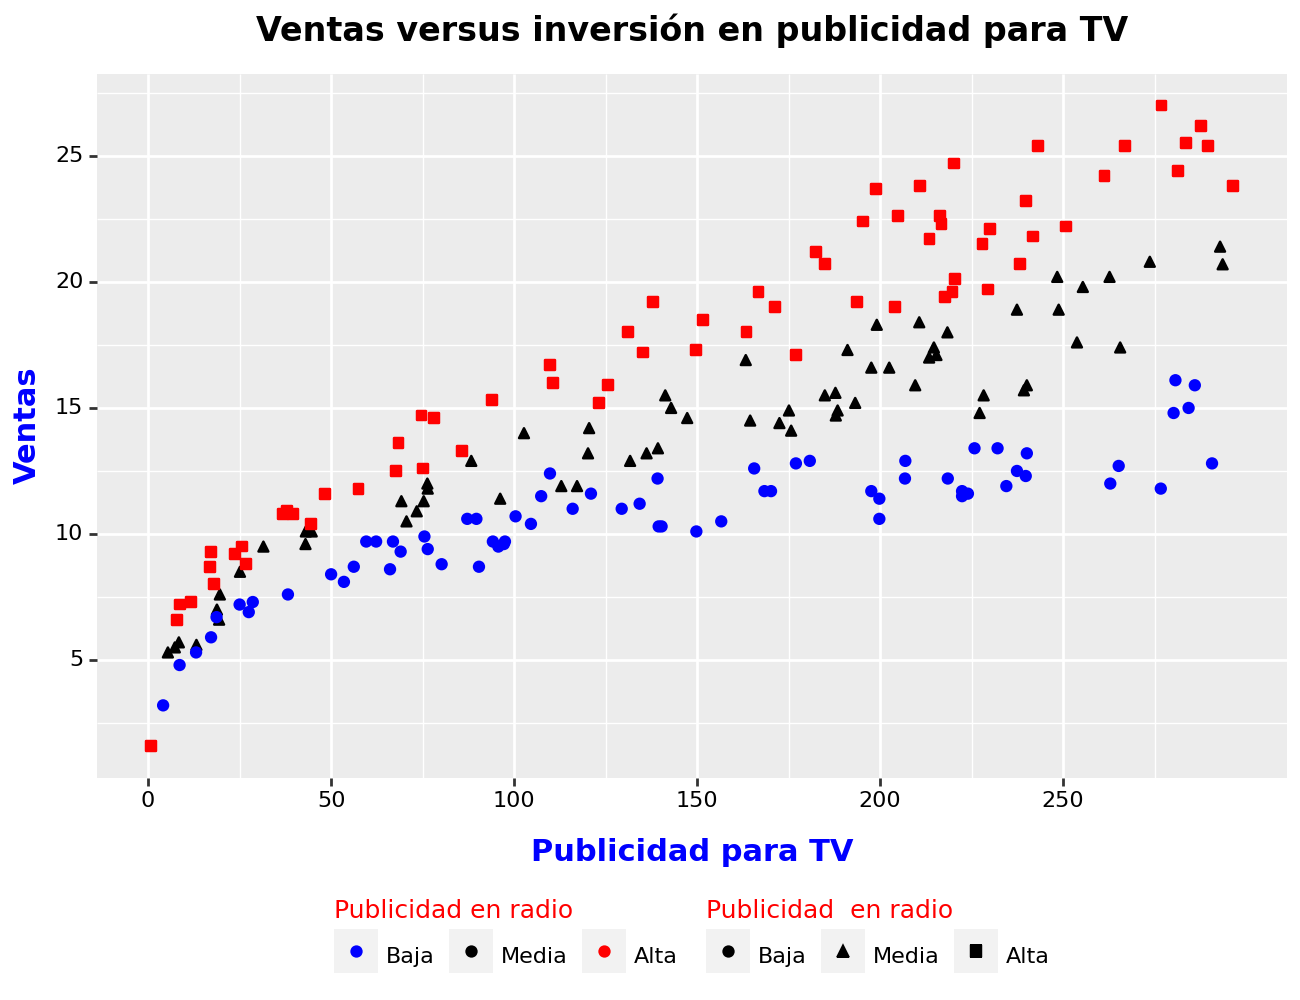

<Figure Size: (650 x 500)>

In [6]:
(ggplot(Advertising,aes(x="TV",y="sales",color="radioC",shape="radioC")) +
 geom_point(size=1.5) +
 labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
      y="Ventas",color="Publicidad en radio",shape="Publicidad  en radio") +
 scale_x_continuous(breaks=list(range(0,300,50))) +
 scale_y_continuous(breaks=list(range(0,30,5))) +
 scale_color_manual(values=["blue","black","red"]) +
 scale_shape_manual(values=["o","^","s"]) + mitema
)

In [7]:
DeepnoteChart(Advertising, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"TV","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"sales","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"radio"},"color":{"sort":null,"type":"quantitative","field":"radio","scale":{"scheme":"redyellowblue"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families wer

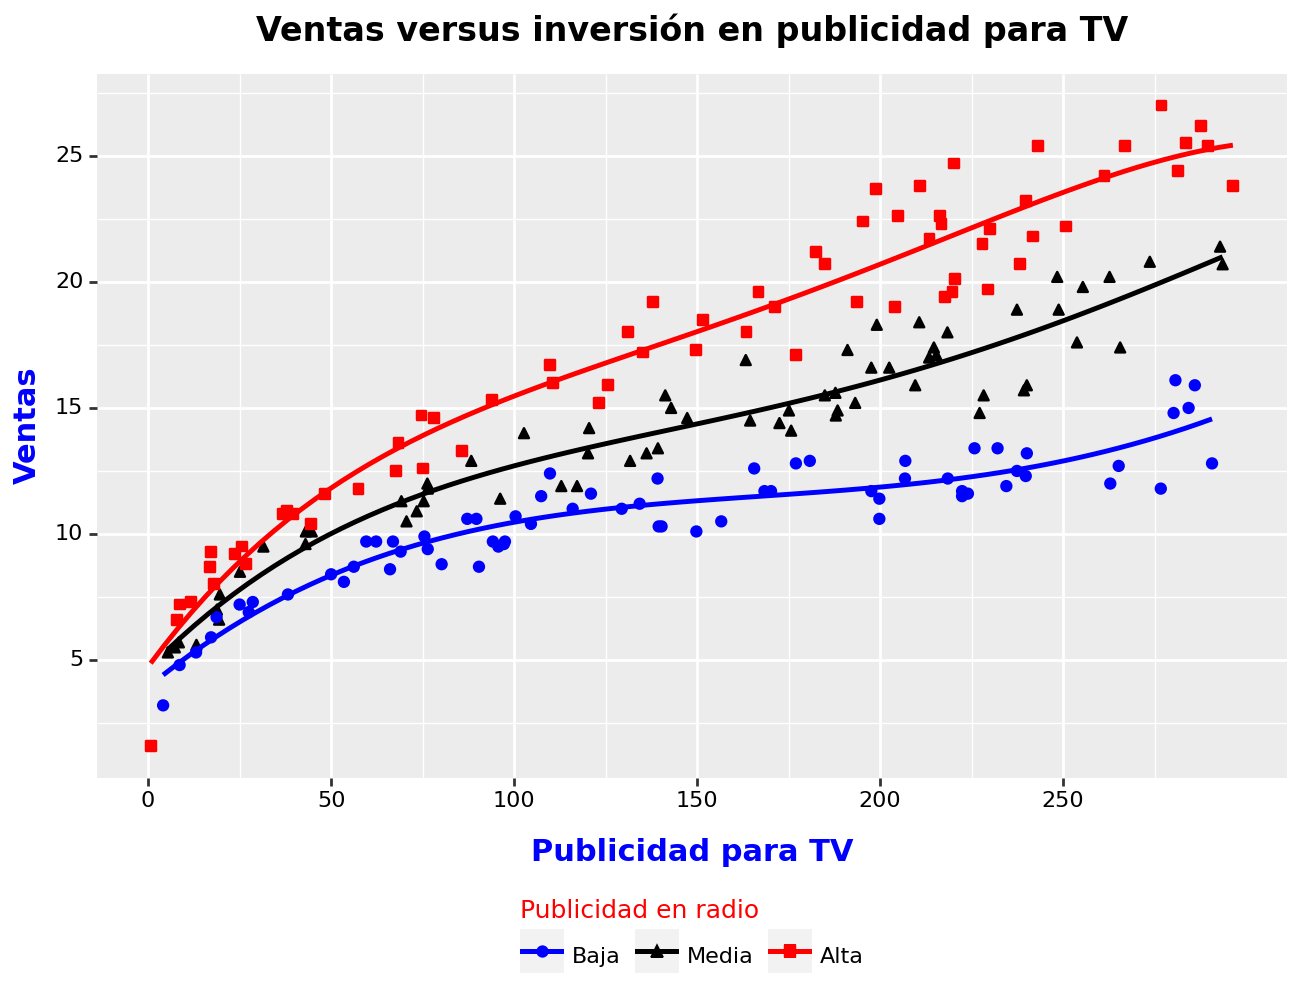

<Figure Size: (650 x 500)>

In [8]:
(ggplot(Advertising,aes(x="TV",y="sales",color="radioC",shape="radioC")) +
 geom_point(size=1.5) +
 geom_smooth(method="lm",formula="y ~ poly(x,4)",level=0.95,se=False,size=1,linetype="solid") + 
 labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
            y="Ventas",color="Publicidad en radio",shape="Publicidad en radio") +
 scale_x_continuous(breaks=list(range(0,300,50))) +
 scale_y_continuous(breaks=list(range(0,30,5))) +
 scale_color_manual(values=["blue","black","red"]) +
 scale_shape_manual(values=["o","^","s"]) + mitema
)

In [9]:
categorias = 4
labels = ["Baja","Media-Baja","Media-Alta","Alta"]
breaks = np.quantile(Advertising.newspaper,[x/categorias for x in range(categorias+1)])
Advertising["newspaperC"] = pd.cut(Advertising.newspaper,breaks,labels=labels,include_lowest=True) 
Advertising.head() 

,TV,radio,newspaper,sales,radioC,newspaperC
0,230.10,37.80,69.20,22.10,Alta,Alta
1,44.50,39.30,45.10,10.40,Alta,Media-Alta
2,17.20,45.90,69.30,9.30,Alta,Alta
3,151.50,41.30,58.50,18.50,Alta,Alta
4,180.80,10.80,58.40,12.90,Baja,Alta


findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families wer

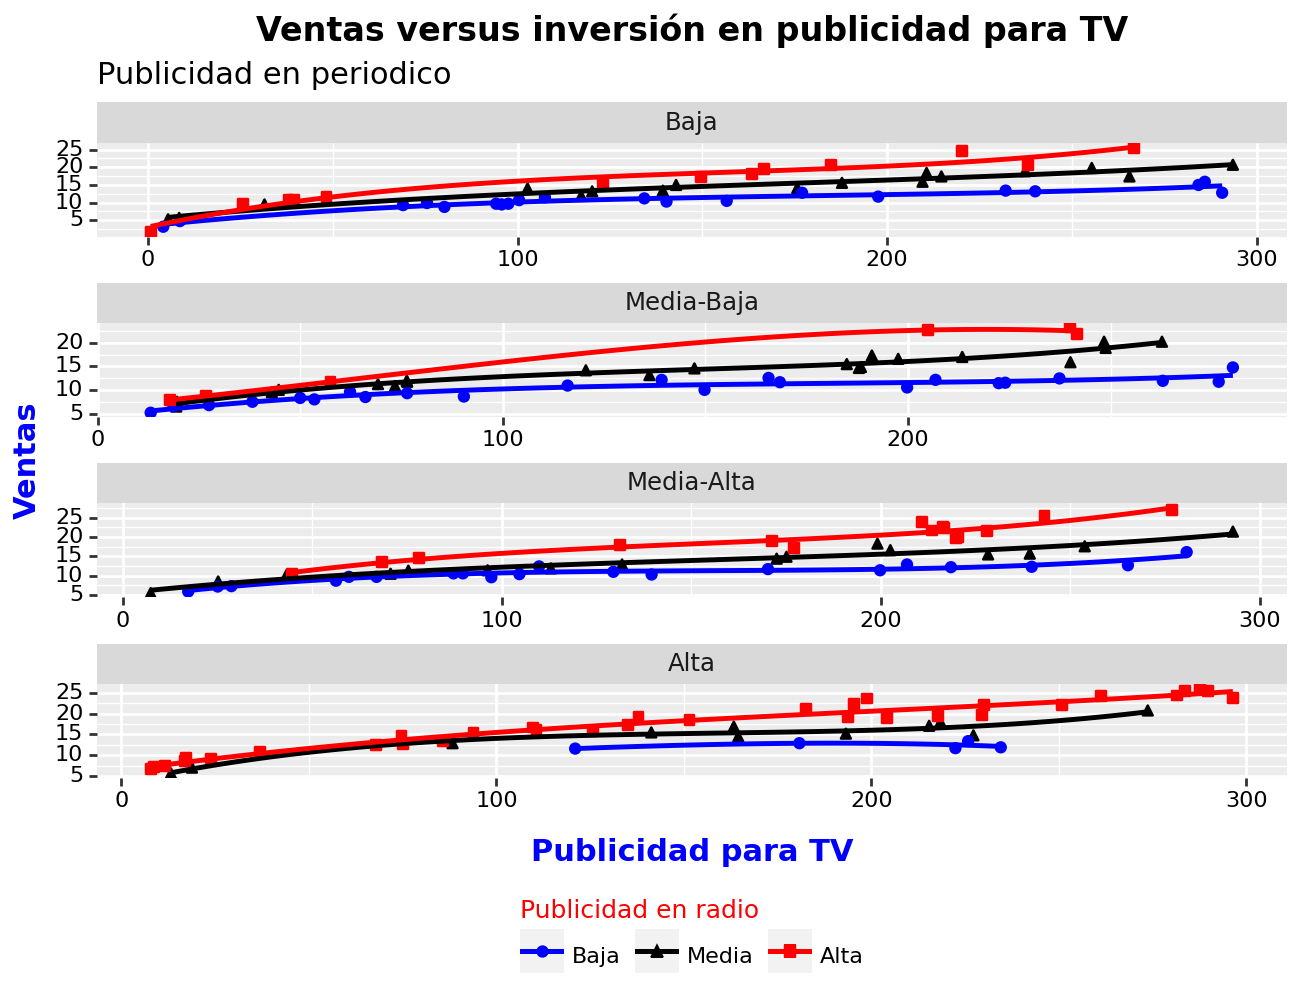

<Figure Size: (650 x 500)>

In [10]:
(ggplot(Advertising,aes(x="TV",y="sales",color="radioC",shape="radioC")) +
 geom_point(size=1.5) +
 geom_smooth(method="lm",formula="y ~ poly(x,3)",level=0.95,se=False,size=1,linetype="solid") + 
 labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
      y="Ventas",color="Publicidad en radio",subtitle="Publicidad en periodico",
      shape="Publicidad en radio") +
 scale_y_continuous(breaks=list(range(0,30,5))) +
 scale_color_manual(values=["blue","black","red"]) +
 scale_shape_manual(values=["o","^","s"]) + 
 facet_wrap("newspaperC",nrow=4,ncol=1,dir="h", scales="free") + mitema
)

In [11]:
spruce = pd.read_table("spruce.txt",delimiter="      ",header=0)
spruce.head()

/tmp/ipykernel_90/3734061076.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,tree,days,size,treat
0,N1T01,152,92.76,normal
1,N1T01,174,156.02,normal
2,N1T01,201,177.68,normal
3,N1T01,227,223.63,normal
4,N1T01,258,225.88,normal


In [12]:
(ggplot(spruce,aes(x="factor(days)",y="size",fill="treat")) + 
 geom_boxplot(outlier_shape="o",outlier_size=0.5,width=0.8,color="black",outlier_color="red") + 
 labs(x="Días desde el comienzo del experimento", y="Tamaño", fill="Atmósfera", color="Atmósfera") + 
 scale_fill_manual(values=["yellow","blue"]) + mitema
)


PlotnineError: "Could not evaluate the 'x' mapping: 'factor(days)' (original error: name 'days' is not defined)"

In [13]:
(ggplot(spruce.query("days >=201"),aes(x="factor(days)",y="size",fill="treat")) + 
 geom_boxplot(outlier_shape="na",outlier_size=0.5,width=0.8,color="black",outlier_color="red") + 
 labs(x="Días desde el comienzo del experimento", y="Tamaño", fill="Atmósfera", color="Atmósfera") + 
 scale_fill_manual(values=["yellow","blue"]) + mitema
)

UndefinedVariableError: name 'days' is not defined

In [14]:
Municipios = pd.read_pickle("Municipios.pkl")
Municipios.info()
Municipios.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  1118 non-null   object 
 1   Dep           1118 non-null   object 
 2   Municipio     1118 non-null   object 
 3   Depmun        1118 non-null   object 
 4   Superficie    1117 non-null   float64
 5   Poblacion     1118 non-null   float64
 6   Irural        1118 non-null   float64
 7   Region        1118 non-null   object 
 8   Tipo          1118 non-null   object 
 9   denspobl      1117 non-null   float64
 10  Zona          1118 non-null   object 
dtypes: float64(4), object(7)
memory usage: 96.2+ KB


,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Eje Cafetero,Capital,"6,625.78",Urbano
1,Antioquia,05,Abejorral,05002,507.13,"20,258.00",45.00,Eje Cafetero,Otros,39.95,Rural
2,Antioquia,05,Abriaquí,05004,296.96,"2,710.00",58.00,Eje Cafetero,Otros,9.13,Rural
3,Antioquia,05,Alejandría,05021,128.93,"4,669.00",48.00,Eje Cafetero,Otros,36.21,Rural
4,Antioquia,05,Amagá,05030,84.13,"30,777.00",28.00,Eje Cafetero,Otros,365.82,Urbano
5,Antioquia,05,Amalfi,05031,"1,209.13","26,552.00",54.00,Eje Cafetero,Otros,21.96,Rural
6,Antioquia,05,Andes,05034,402.50,"43,713.00",38.00,Eje Cafetero,Otros,108.60,Urbano
7,Antioquia,05,Angelópolis,05036,81.88,"5,790.00",37.00,Eje Cafetero,Otros,70.72,Urbano
8,Antioquia,05,Angostura,05038,338.67,"11,462.00",47.00,Eje Cafetero,Otros,33.84,Rural
9,Antioquia,05,Anorí,05040,"1,413.77","18,737.00",58.00,Eje Cafetero,Otros,13.25,Rural


findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families wer

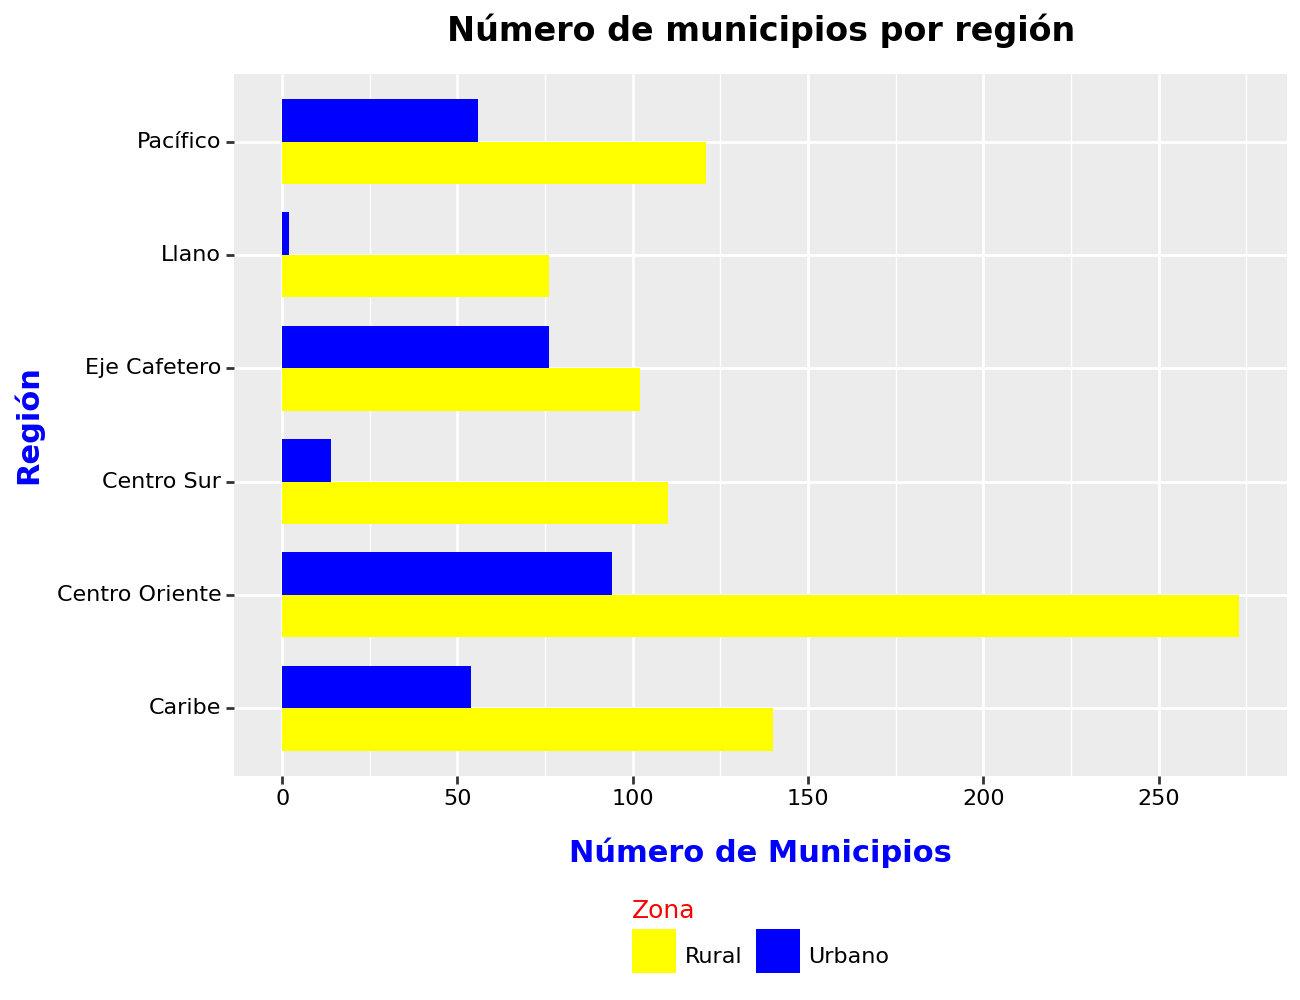

<Figure Size: (650 x 500)>

In [15]:
(ggplot(Municipios,aes("Region")) + 
 geom_bar(aes(fill="Zona"),position=position_dodge(),width=0.75) + 
 scale_y_continuous(breaks=list(range(0,300,50))) + 
 scale_fill_manual(values=["yellow","blue"]) + 
 labs(title="Número de municipios por región", x="Región", y="Número de Municipios") + 
 coord_flip() + mitema
)

findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families wer

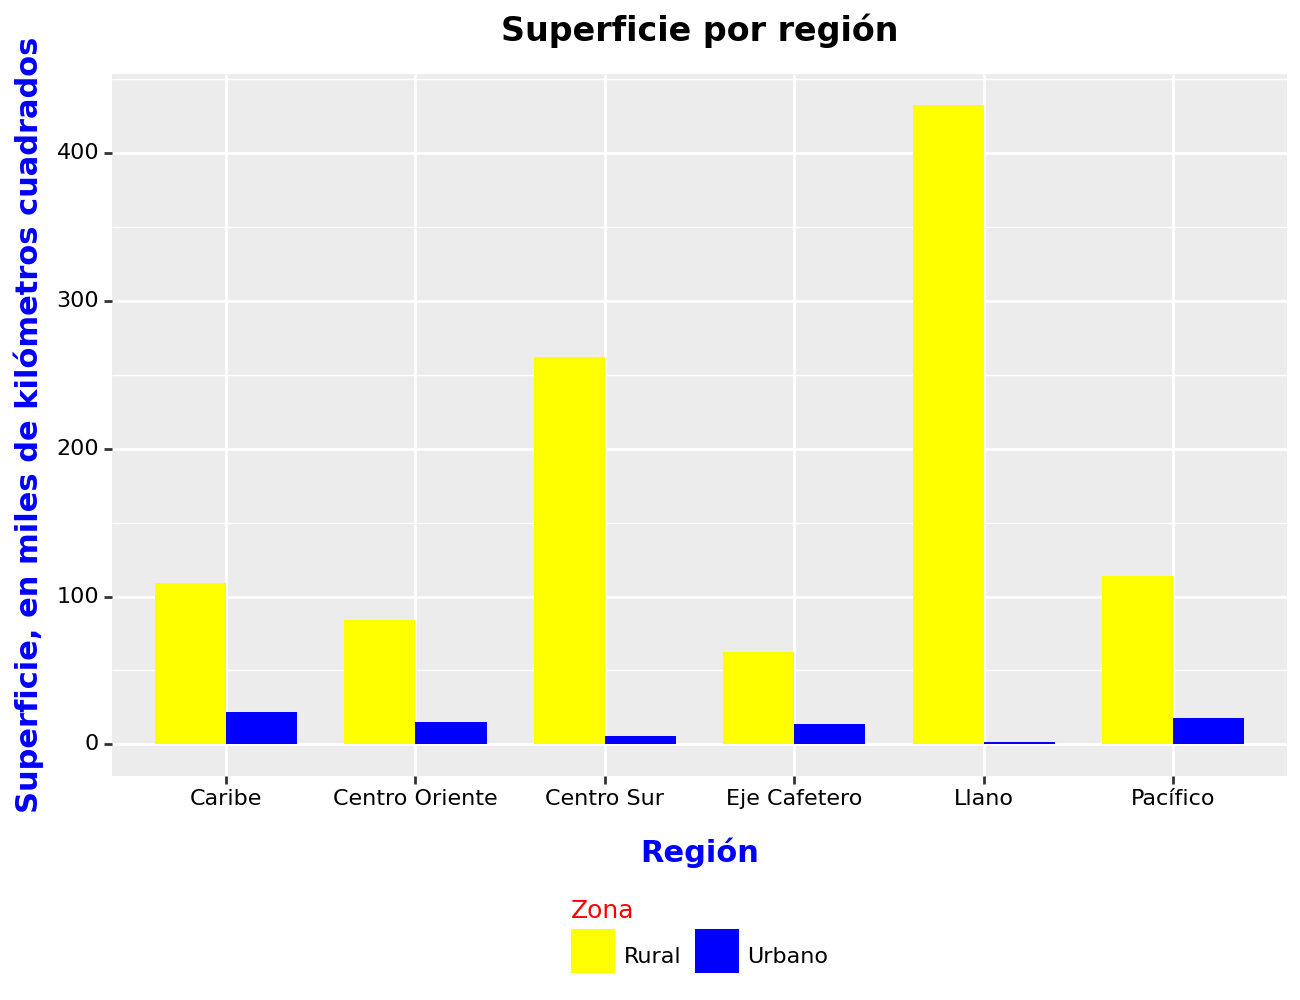

<Figure Size: (650 x 500)>

In [16]:
(ggplot(Municipios,aes("Region")) + 
 geom_bar(aes(fill="Zona",weight="Superficie/1000"),position=position_dodge(),width=0.75) + 
 scale_y_continuous(breaks=list(range(0,600,100))) + 
 scale_fill_manual(values=["yellow","blue"]) + 
 labs(title="Superficie por región", x="Región", y="Superficie, en miles de kilómetros cuadrados") + 
theme(axis_text_x=element_text(angle=45))+ mitema
)

findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman, Times New Roman
findfont: Generic family 'serif' not found because none of the following families wer

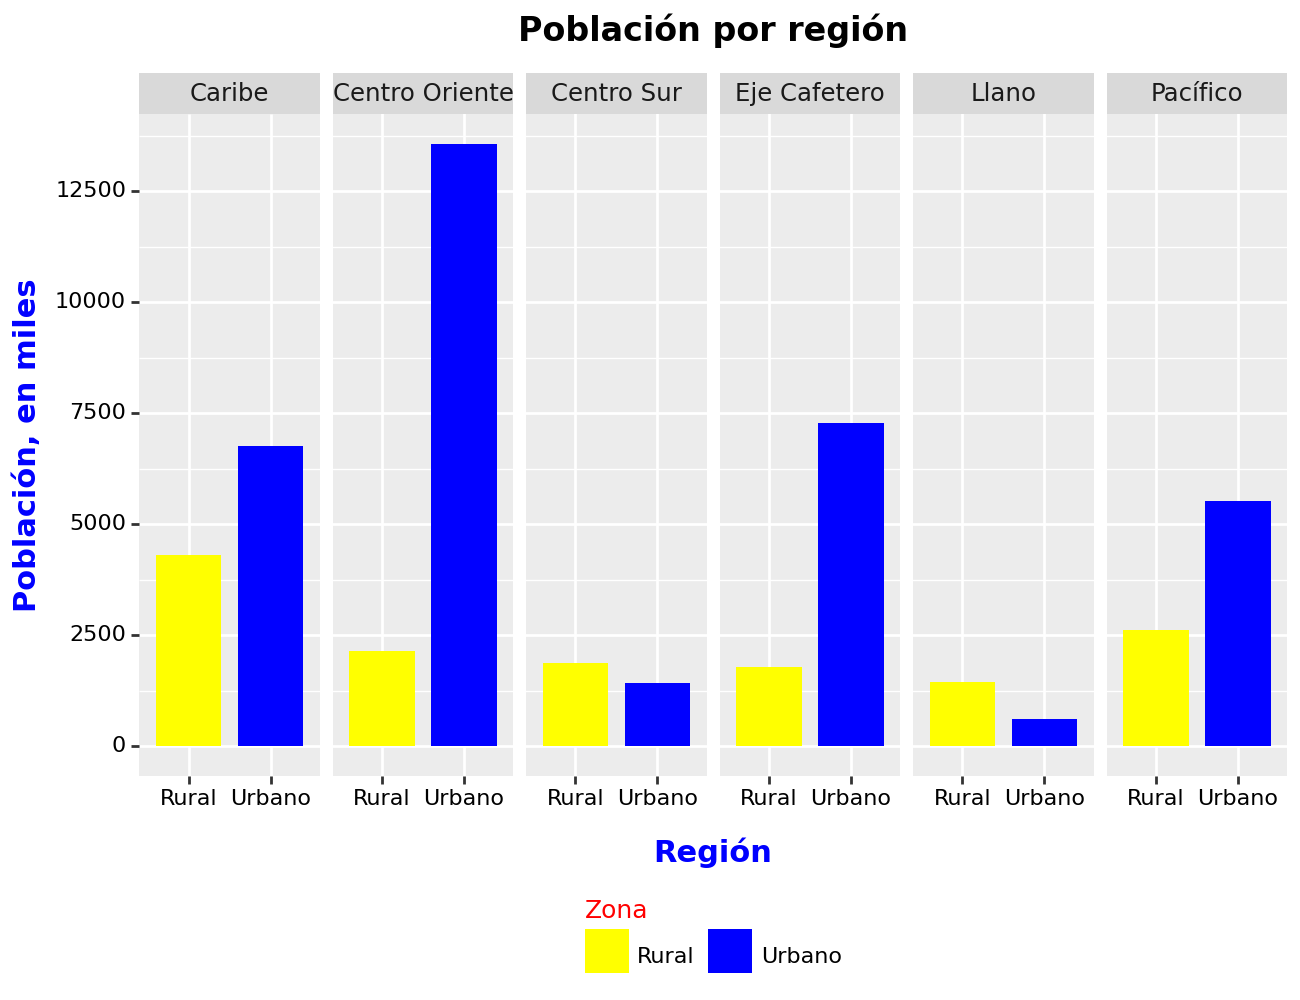

<Figure Size: (650 x 500)>

In [17]:
(ggplot(Municipios,aes(x="Zona",fill="Zona",weight="Poblacion/1000")) + 
 geom_bar(position=position_dodge(),width=0.8) + 
 scale_y_continuous(breaks=list(range(0,15000,2500))) + 
 scale_fill_manual(values=["yellow","blue"]) + 
 labs(title="Población por región", x="Región", y="Población, en miles") + 
 facet_wrap("Region",nrow=1,ncol=6,dir="h") + mitema
)

In [18]:
stocks = pd.read_table("stocks.dlm",delimiter=" ",header=0,decimal=",",thousands=".",
                        names=["Stock","Date","Open","High","Low","Close","Volume","AdjClose"],
                        dtype={"Stock":str,"Date":str,"Open":np.float64,"High":np.float64,
                               "Low":np.float64,"Close":np.float64,"Volume":np.float64,
                               "AdjClose":np.float64},
                        parse_dates=["Date"], date_format="%d%b%y")
stocks.info()
stocks.head(10)

TypeError: read_table() got an unexpected keyword argument 'date_format'

In [19]:
(ggplot(stocks,aes(x="Date",y="Close",color="Stock",shape="Stock")) +
 geom_line() +
 labs(title="",x="",y="Close",color="Stock",shape="Stock") +
 scale_x_date(date_breaks="1 year", date_labels="%Y") + 
 scale_y_continuous(breaks=list(range(0,250,25))) + 
 theme(axis_text_x=element_text(angle=90))
 )

NameError: name 'stocks' is not defined

In [ ]:
(ggplot(stocks.query("Stock=='IBM'"),aes(x="Date",y="Open")) +
 geom_point(color="red",size=1.25) +
 geom_line(color="red") +
 labs(title="",x="",y="Open") +
 scale_x_date(date_breaks="1 year", date_labels="%Y") + 
 scale_y_continuous(breaks=list(range(0,250,25))) + mitema + 
 theme(axis_text_x=element_text(angle=90))
 )

In [22]:
!pip install geopandas
import geopandas as gpd

MGN_MPIO = gpd.read_file("MGN_MPIO_POLITICO.shp")
def calculate_center(df):
    original_crs = df.crs
    planar_crs = 'EPSG:3857'
    return df['geometry'].to_crs(planar_crs).centroid.to_crs(original_crs)
MGN_MPIO['center'] = calculate_center(MGN_MPIO)


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


DriverError: MGN_MPIO_POLITICO.shp: No such file or directory

In [ ]:
Municipios = pd.read_pickle("Municipios.pkl")
munis = MGN_MPIO.merge(Municipios,right_on="Depmun",left_on="MPIO_CCNCT",how="inner")
munis["labels"] = np.where(munis["Irural"] > 52,munis["Municipio"],"")
munis.info()

In [ ]:
from plotnine import *
(ggplot(munis.query("Dep=='25'")) +
 geom_map(aes(fill="Irural"),color="gray",linetype="solid") + 
 geom_text(aes('center.x','center.y',label="labels"),size=6,fontweight='bold') + 
 labs(x="Longitud",y="Latitud",title="Cundinamarca",fill="Índice de\nRuralidad\n") +
 scale_fill_gradient(low="white",high="orange") + mitema + 
 theme(legend_position="right",legend_direction="vertical")
 )

In [20]:
Estaciones = pd.read_excel("Estaciones.xlsx",dtype={'CODIGO': str, 'Depmun': str, 'ELEV':np.float64})
def Dep(x):
    return(x[0:2])
Estaciones["Dep"] = Estaciones["Depmun"].apply(Dep)
Estaciones.head()

,CODIGO,CAT,NOMBRE,ELEV,longitud2,latitud2,PRECIP,NDLL,Depmun,longitud,latitud,Dep
0,26215010,CO,Concordia,"2,032.00","75ø55'11""W","6ø2'23""N","2,234.71",211.20,05209,-75.92,6.04,05
1,26210080,PM,Herradura La,550.00,"75ø52'26,3""W","6ø5'57,2""N","1,897.48",118.70,05209,-75.87,6.10,05
2,27010650,PM,Don Matias,"2,200.00","75ø24'0""W","6ø29'0""N","2,409.09",195.08,05237,-75.40,6.48,05
3,27010400,PM,Riogrande Almacen,"2,070.00","75ø24'0""W","6ø33'0""N","3,195.15",224.22,05237,-75.40,6.55,05
4,27010440,PM,Riogrande Mocorong,"1,784.00","75ø22'0""W","6ø33'0""N","3,589.65",230.06,05237,-75.37,6.55,05


In [21]:
mydep = ('25')
mydepname = ' y '.join(munis.query("Dep in @mydep").Departamento.unique())

(ggplot(munis.query("Dep in @mydep")) +
 geom_map(fill="yellow",color="gray",linetype="solid") + 
 geom_point(Estaciones.query("Dep in @mydep"),aes(x="longitud",y="latitud"),shape="o",size=1,color="blue") + 
 labs(x="Longitud",y="Latitud",title="Estaciones de monitoreo climático en " + mydepname) + mitema
)

NameError: name 'munis' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd2fca3f-dc64-4c71-8bd4-adda531fa911' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>